In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

#fish 데이터 셋

In [3]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [4]:
fish= pd.read_csv(fish_csv)

In [5]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [9]:
# Bream(도미), Smelt(빙어)로만 이루어진 DataFrame
subset = fish[fish.Species.isin(['Bream','Smelt'])]
subset.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [10]:
subset.tail(3)

,Species,Weight,Length,Diagonal,Height,Width
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [13]:
X = subset.iloc[:,1:].values.copy() #특성배열
X[:3]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961]])

In [15]:
y = subset.Species.values.copy() #1차원배열
y[:3]

array(['Bream', 'Bream', 'Bream'], dtype=object)

In [18]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.25,
                                          random_state=42,
                                          stratify=y)
# y가 도미와 빙어의 비율이 일정하지 않기때문에 각자 비율이 랜덤하고 일정하게 분포하겠다.
# stratify = y 

# KNN Classifier

In [19]:
# 모델 선택
knn_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [20]:
# 모델 훈련
knn_model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [22]:
# 훈련 셋에서의 예측값
tr_pred = knn_model.predict(X_tr)
tr_pred[:3]

array(['Bream', 'Bream', 'Smelt'], dtype=object)

In [26]:
# 훈련 셋에서의 confusion matrix
confusion_matrix(y_tr,tr_pred)

array([[26,  0],
       [ 0, 10]])

In [29]:
# 테스트 셋에서의 예측값
te_pred = knn_model.predict(X_te)
te_pred[:3]

array(['Bream', 'Bream', 'Bream'], dtype=object)

In [30]:
#테스트 셋에서의 confusion matrix
confusion_matrix(y_te, te_pred)

array([[9, 0],
       [0, 4]])

In [31]:
# 테스트 셋 첫 5개 샘플의 예측값
te_pred[:5]

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'], dtype=object)

In [32]:
# 테스트 셋 예측 확률
te_pred_prob = knn_model.predict_proba(X_te)
te_pred_prob[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [37]:
samples = X_te[:5] # 테스트셋에서 첫 5개 물고기 샘플데이터
samples_scaled = knn_model['scaler'].transform(samples) #샘플 데이터를 스케일링.

In [41]:
# 스케일링된 샘플 데이터에서 가장 가까운 이웃 5개의 인덱스들을 찾음.
neigh_index = knn_model['clf'].kneighbors(samples_scaled, return_distance=False)
neigh_index

array([[ 0,  9, 16, 21, 35],
       [35, 26, 21, 10, 25],
       [24, 30, 34,  5, 12],
       [20, 22, 13,  8,  6],
       [13, 22,  8,  6,  2]])

In [42]:
y_tr[neigh_index] #샘플들에서 가장 가까운 이웃들의 어종

array([['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
       ['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt']], dtype=object)

# Logistic Regression

In [45]:
# 모델 생성
logit_model = Pipeline([('scaler', StandardScaler()),
                        ('clf', LogisticRegression())])

In [46]:
#모델 훈련 (1) X_tr 스케일링 (fit_transform) (2) clf.fit(X,y)
logit_model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [49]:
# 훈련 셋 예측확률
tr_proba = logit_model.predict_proba(X_tr)
tr_proba[:5]
# 왼쪽은 도미가 될 확률 / 오른쪽은 빙어가 될 확률 // 둘이 합치면 1.0이 되야함

array([[0.99729143, 0.00270857],
       [0.95902055, 0.04097945],
       [0.04269126, 0.95730874],
       [0.98409688, 0.01590312],
       [0.04235688, 0.95764312]])

In [48]:
# 훈련 셋 예측값
tr_pred = logit_model.predict(X_tr)
tr_pred[:5]

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype=object)

In [50]:
#테스트 셋 예측 확률
te_proba = logit_model.predict_proba(X_te)
te_proba[:5]

array([[9.97328384e-01, 2.67161624e-03],
       [9.94425341e-01, 5.57465921e-03],
       [9.99430626e-01, 5.69374399e-04],
       [1.02252107e-01, 8.97747893e-01],
       [5.42567620e-02, 9.45743238e-01]])

In [53]:
# 테스트 셋 예측값
te_pred = logit_model.predict(X_te)
te_pred[:5]

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'], dtype=object)

In [54]:
# 테스트 셋 confusion matrix
confusion_matrix(y_te, te_pred)

array([[9, 0],
       [0, 4]])

In [55]:
logit_model['clf'].coef_

array([[-0.55266843, -0.78808545, -0.82264592, -0.85732701, -0.80231813]])

In [56]:
logit_model['clf'].intercept_

array([-2.70041052])

## sigmoid 함수

$$
\phi(z) = \dfrac{e^z}{e^z + 1} = \dfrac{1}{1 + e^{-z}}
$$

* odds 비(오즈비): 양성이 될 확률과 음성이 될 확률의 비율. $ \frac{p}{1 - p} $
* logit: odds비에 자연로그를 취한 값. $ \log (\frac{p}{1-p}) $
* 시그모이드 함수는 분류문제에서만 적용이 되며, 0과 1 확률로만 본다

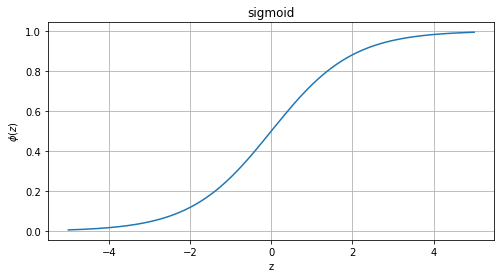

In [60]:
z = np.arange(-5,5,0.001)
sigmoid = 1/(1+ np.exp(-z))

plt.figure(figsize=(8,4))
plt.plot(z, sigmoid)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.title('sigmoid')
# sigmoid는 항상 0 <sigmoid < 1
plt.show()

__Logistic Regression__

*   선형 회귀
$$
z_i = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + \cdots = w_0 + \sum_j x_{ij} \cdot w_j
$$

*   선형 회귀 공식으로 계산된 결과를 sigmoid 함수의 argument로 전달
$$
p_i = \phi(z_i) = \dfrac{1}{1 + e^{-z}} 
    = \dfrac{1}{1 + exp(-(w_0 + \sum_j x_{ij} \cdot w_j))}
$$

*   sigmoid 함수의 리턴값은 항상 0 ~ 1이므로, Logistic Regression은 sigmoid 함수의 리턴값을 양성이 될 확률로 해석.

## 손실 함수


* 이진 분류에서는 손실 함수 log loss가 최소가 되는 계수들을 찾는 것이 목적.

*   Logistic regression cost function(__log loss__)

>>   $ L = -[y \log{p} + (1-y) \log{(1-p)}] $

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} [y^{(i)} \log({p}^{(i)}) + (1-y^{(i)}) \log(1 - {p}^{(i)})] $

>>   N: the number of samples

* 다중 클래스 분류에서는 손실 함수 크로스 엔트로피가 최소가 되는 계수들을 찾는 것이 목적.
*   __Cross entropy__ cost function

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{m} y_{k}^{(i)} \log({p}_{k}^{(i)}) $

>>   N: the number of samples

>>   m: the number of classes


In [61]:
samples = X_te[:5]  # 빙어(Smelt)가 될 확률을 계산하고 싶은 샘플 5개
samples_scaled = logit_model['scaler'].transform(samples)  # 스케일일된 샘플 데이터
w0 = logit_model['clf'].intercept_  # 손실함수(log loss) 최적화를 통해서 찾은 절편
w = logit_model['clf'].coef_[0]  # 손실함수(log loss) 최적화를 통해서 찾은 계수들
z = w0 + samples_scaled @ w  # 선형 회귀식
p = 1 / (1 + np.exp(-z))  # 선형 회귀 결과를 logistic 함수의 argument로 전달
p  # 샘플이 1(positive)가 될 확률.

array([2.67161624e-03, 5.57465921e-03, 5.69374399e-04, 8.97747893e-01,
       9.45743238e-01])

In [62]:
np.c_[1-p, p]

# 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기    
# np.c_[a, b]

array([[9.97328384e-01, 2.67161624e-03],
       [9.94425341e-01, 5.57465921e-03],
       [9.99430626e-01, 5.69374399e-04],
       [1.02252107e-01, 8.97747893e-01],
       [5.42567620e-02, 9.45743238e-01]])

In [63]:
logit_model.predict_proba(X_te[:5])

array([[9.97328384e-01, 2.67161624e-03],
       [9.94425341e-01, 5.57465921e-03],
       [9.99430626e-01, 5.69374399e-04],
       [1.02252107e-01, 8.97747893e-01],
       [5.42567620e-02, 9.45743238e-01]])

# SGD classifier

SGD(Stochastic Gradient Descent, 확률적 경사 하강법)을 이용해서 (이진, 다중클래스)분류 문제의 손실 함수를 최소로 만드는 선형회귀식을 찾아서 각 클래스가 될 확률을 계산하고, 예측을 하는 분류기

In [73]:
sgd_model = Pipeline([('scaler', StandardScaler()),
                      ('reg', SGDClassifier(loss='log', random_state=42))])
# SGDClassifier 생성자의 파라미터 loss
# loss = 'log_loss' : 확률 기반 분류기. Logistic regression.
# loss = 'hinge': 기본값. 확률 기반이 아니기 때문에 확률을 계산하지 않음.

In [74]:
sgd_model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', SGDClassifier(loss='log', random_state=42))])

In [75]:
tr_proba = sgd_model.predict_proba(X_tr) #훈련 셋 예측확률
tr_proba[:5]

array([[1.00000000e+00, 1.47867618e-12],
       [9.99999705e-01, 2.94785720e-07],
       [1.13199698e-06, 9.99998868e-01],
       [9.99999996e-01, 3.95254755e-09],
       [1.09509578e-06, 9.99998905e-01]])

In [76]:
tr_pred = sgd_model.predict(X_tr) 
tr_pred[:5]

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype='<U5')

In [77]:
confusion_matrix(y_tr,tr_pred)

array([[26,  0],
       [ 0, 10]])

In [78]:
te_proba = sgd_model.predict_proba(X_te) # 테스트 샷 예측 확률
te_proba[:5]

array([[1.00000000e+00, 1.39020965e-12],
       [1.00000000e+00, 3.41183802e-11],
       [1.00000000e+00, 1.47339107e-15],
       [8.46736756e-05, 9.99915326e-01],
       [3.70560875e-06, 9.99996294e-01]])

In [81]:
te_pred = sgd_model.predict(X_te)
te_pred[:5]

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'], dtype='<U5')

In [82]:
confusion_matrix(y_te,te_pred)

array([[9, 0],
       [0, 4]])